## Machine Learning Workshop Project 2 - https://www.kaggle.com/mirichoi0218/insurance 

***Shayan Karimi***

# Preprocessing Phase  

Loading The Dataset

In [5]:
## Loading the dataset
import pandas as pd

# from google.colab import files
# uploaded = files.upload()

df=pd.read_csv("./insurance.csv")

Dataset first five rows

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataaset Size

In [7]:
df.shape

(1338, 7)

Finding Missing Values 

In [8]:
missing_data=df.isnull()

for col in missing_data.columns.values.tolist():
  print(col)
  print(missing_data[col].value_counts())   ## Flase means the data is not missing and True means we have missing data
  print("*"*20)

### As you can see we do not have any missing value

age
False    1338
Name: age, dtype: int64
********************
sex
False    1338
Name: sex, dtype: int64
********************
bmi
False    1338
Name: bmi, dtype: int64
********************
children
False    1338
Name: children, dtype: int64
********************
smoker
False    1338
Name: smoker, dtype: int64
********************
region
False    1338
Name: region, dtype: int64
********************
charges
False    1338
Name: charges, dtype: int64
********************


Checking the datatypes of each attribute

In [9]:
df.dtypes   ## As we can see we have three categorical attributes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Handling Categorical Attributes

In [10]:
df["sex"].value_counts() 

male      676
female    662
Name: sex, dtype: int64

In [11]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
sex_encoded=pd.get_dummies(df['sex'])
sex_encoded.head(20)

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [14]:
smoker_encoded=pd.get_dummies(df['smoker'])
smoker_encoded.head(20)

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [15]:
region_encoded=pd.get_dummies(df['region'])
region_encoded.head(20)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [16]:
### Merging New Columns created bu one-ot-encoding and removing old ones from The Datasets
df = pd.concat([df,sex_encoded,smoker_encoded,region_encoded], axis=1)

# drop original columns
df.drop(['sex','smoker','region'], axis = 1, inplace=True)

In [17]:
df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [18]:
df.shape  ## This is our new dataset

(1338, 12)

In [19]:
df.dtypes

age            int64
bmi          float64
children       int64
charges      float64
female         uint8
male           uint8
no             uint8
yes            uint8
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [20]:
y_df=df.pop('charges')
x_df=df

In [21]:
x_df.head()

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [22]:
y_df.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
x_df.shape

(1338, 11)

In [24]:
y_df.shape

(1338,)

Standardization and Normalizaion

In [25]:
import numpy as np

x=np.asarray(x_df)
y=np.asarray(y_df)

In [26]:
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [27]:
x.shape

(1338, 11)

In [28]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [29]:
y.shape

(1338,)

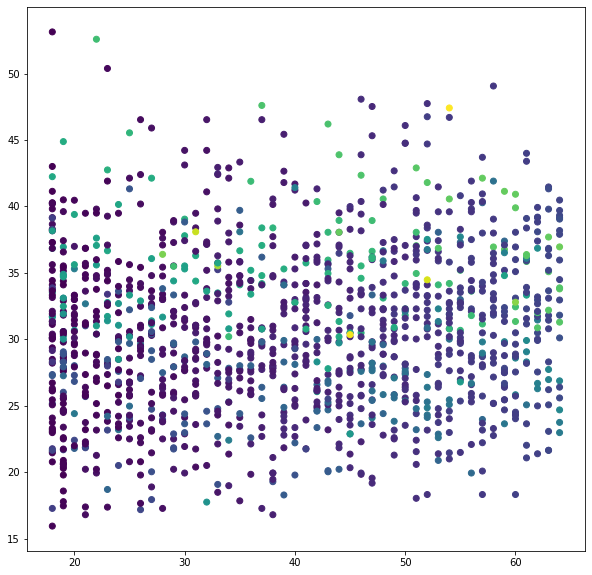

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=y);

In [31]:
x.mean(axis=0)


array([39.20702541, 30.66339686,  1.09491779,  0.49476831,  0.50523169,
        0.79521674,  0.20478326,  0.24215247,  0.24289985,  0.27204783,
        0.24289985])

In [32]:
x.var(axis=0)


array([1.97253852e+02, 3.71600900e+01, 1.45212664e+00, 2.49972629e-01,
       2.49972629e-01, 1.62847076e-01, 1.62847076e-01, 1.83514649e-01,
       1.83899513e-01, 1.98037809e-01, 1.83899513e-01])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
stscaler=StandardScaler().fit(x)
x_sscaler=stscaler.transform(x)

In [35]:
x_sscaler.mean(axis=0)

array([-1.80556450e-16, -2.12419353e-16, -5.57600802e-17,  4.77943544e-17,
       -1.23468749e-16, -1.60642136e-16,  1.06209676e-17, -2.52247982e-17,
        1.06209676e-16, -1.06209676e-17,  1.03554435e-16])

In [36]:
x_sscaler.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

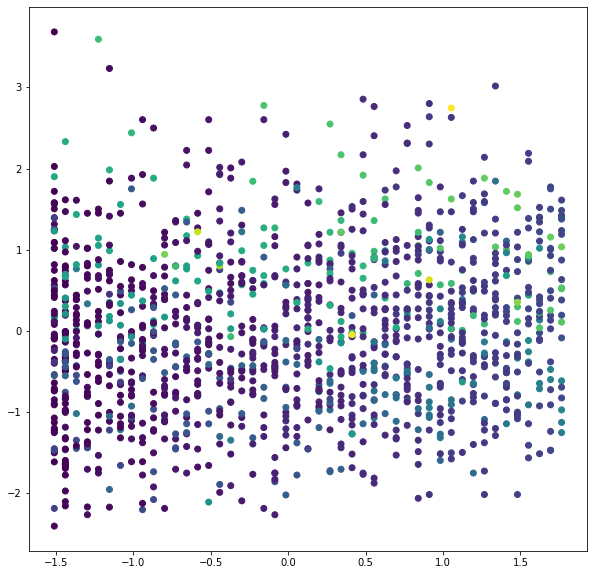

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(x_sscaler[:, 0], x_sscaler[:, 1], c=y);

In [38]:
from sklearn.preprocessing import Normalizer, normalize
from numpy.linalg import norm

nrm = Normalizer(norm='l2').fit(x)

x_nrm = nrm.transform(x)     

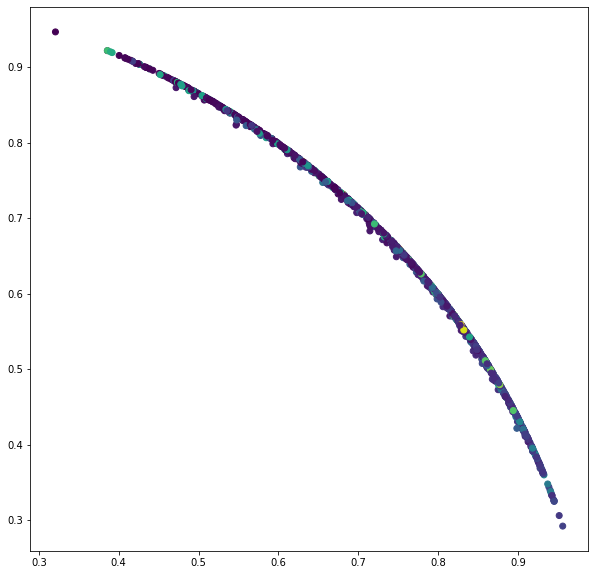

In [39]:
plt.figure(figsize=(10, 10))
plt.scatter(x_nrm[:, 0], x_nrm[:, 1], c=y);

Polynomial Features

In [40]:
from sklearn.preprocessing import PolynomialFeatures
polyf = PolynomialFeatures().fit(x)
xp=polyf.transform(x)
xp.shape

(1338, 78)

PCA

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95).fit(x)     

x_pca = pca.transform(x)

x_pca.shape          


(1338, 2)

Text(0, 0.5, 'PCA 2')

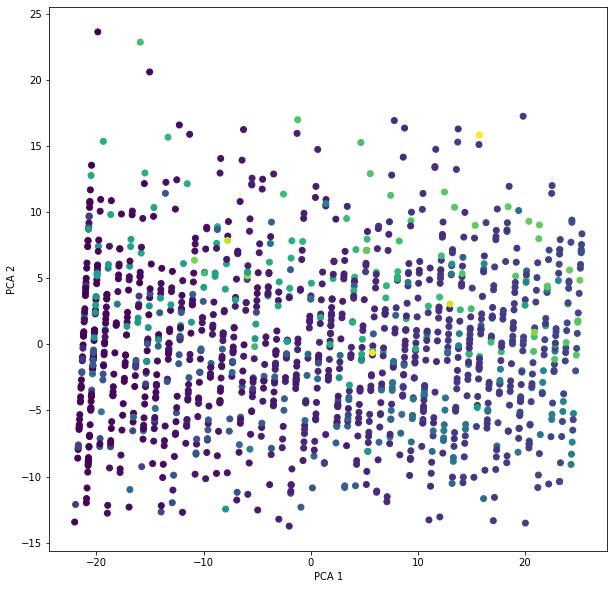

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1] , c=y)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [43]:
pca2 = PCA(n_components=0.95).fit(xp)     

xp_pca = pca2.transform(xp)

xp_pca.shape                                             ### so polynomial features add no specific features

(1338, 2)

(array([287., 249., 205., 193.,  71.,  58.,  46.,  40.,  25.,  10.,  25.,
         34.,  30.,  27.,  22.,  10.,   1.,   1.,   2.,   2.]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <a list of 20 Patch objects>)

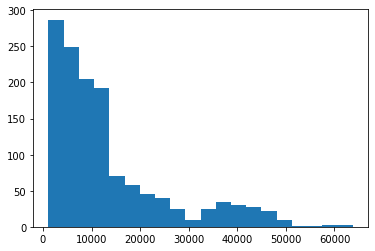

In [44]:
plt.hist(y,bins=20)                   #the distributation of our label (charge column)

#Creating Different **pipelines** With **Regression Based Algorithms** Phase

##Linear Regression Algorithm

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline  import Pipeline
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [46]:
x_train.shape

(1070, 11)

In [47]:
x_test.shape

(268, 11)

In [48]:
y_train.shape

(1070,)

In [49]:
y_test.shape

(268,)

In [50]:
lin_r=LinearRegression().fit(x_train,y_train)

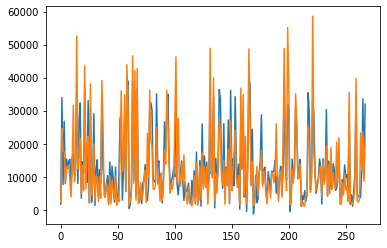

In [51]:
plt.plot(lin_r.predict(x_test))
plt.plot(y_test)

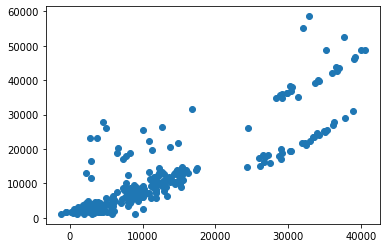

In [52]:
plt.scatter(lin_r.predict(x_test),y_test)

In [53]:
lin_r.score(x_test,y_test)             #R2 score

0.7184892346639556

In [54]:
100*lin_r.score(x_test,y_test)         #Accuracy

71.84892346639556

###*Final Pipeline For Linear Regression Algorithm*




In [130]:
steps=[('scaler',StandardScaler()),
       ('poly feature',PolynomialFeatures()),
       ('dimension reduction',PCA(n_components=0.95)),
       (('regression'),LinearRegression())]

lin_pipline=Pipeline(steps=steps)
lin_pipline.fit(x_train,y_train)
lin_pipline.score(x_test,y_test)

0.8263741406000221

## Ridge Regression Algorithm

In [56]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.1).fit(x_train,y_train)
rr.score(x_test,y_test)

0.7185073140504532

In [57]:
rr=Ridge(alpha=0.9).fit(x_train,y_train)
rr.score(x_test,y_test)

0.7186473052040365

In [58]:
rr=Ridge(alpha=0.01).fit(x_train,y_train)
rr.score(x_test,y_test)

0.7184910484373324

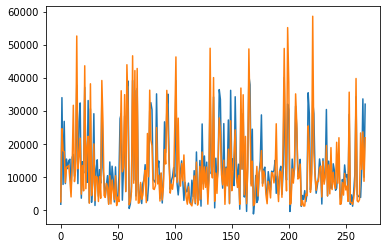

In [59]:
plt.plot(rr.predict(x_test))
plt.plot(y_test)

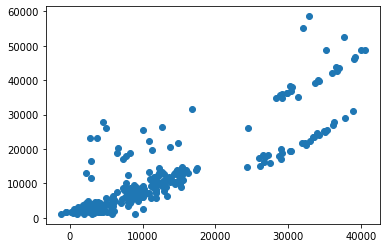

In [60]:
plt.scatter(rr.predict(x_test),y_test)

###*Final Pipeline For Ridge Regression Algorithm*







In [61]:
steps=[('scaler',StandardScaler()),
       ('poly feature',PolynomialFeatures(degree=2,interaction_only=True)),
       ('dimension reduction',PCA(n_components=0.95)),
       (('regression'),Ridge(alpha=0.01))]

lr_pipline=Pipeline(steps=steps)
lr_pipline.fit(x_train,y_train)
lr_pipline.score(x_test,y_test)

0.8017543931490523

## Lasso Regression Algorithm



In [62]:
from sklearn.linear_model import Lasso

In [63]:
ls=Lasso(alpha=0.01).fit(x_train,y_train)
ls.score(x_test,y_test)

0.7184897306629823

In [64]:
ls=Lasso(alpha=0.2).fit(x_train,y_train)
ls.score(x_test,y_test)

0.718499166265429

In [65]:
ls=Lasso(alpha=0.9).fit(x_train,y_train)
ls.score(x_test,y_test)

0.7184943596892134

###*Final Pipeline For Lasso Regression Algorithm*

In [66]:
steps=[('scaler',StandardScaler()),
       ('poly feature',PolynomialFeatures(degree=2,interaction_only=True)),
       ('dimension reduction',PCA(n_components=0.95)),
       (('regression'),Lasso(alpha=0.9))]

lasr_pipline=Pipeline(steps=steps)
lasr_pipline.fit(x_train,y_train)
lasr_pipline.score(x_test,y_test)

0.8017651593569302

## ElasticNet Algorithm



In [67]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.9,l1_ratio=0.8).fit(x_train,y_train)
en.score(x_test,y_test)

0.651916944105035

In [68]:
steps=[('scaler',StandardScaler()),
       ('poly feature',PolynomialFeatures(degree=2,interaction_only=True)),
       ('dimension reduction',PCA(n_components=0.95)),
       (('regression'),ElasticNet(alpha=0.9,l1_ratio=0.8))]

en_pipline=Pipeline(steps=steps)
en_pipline.fit(x_train,y_train)
en_pipline.score(x_test,y_test)

0.7990447236753879

# Multi-layer Perceptron Regressor Algorithm

In [92]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor((100,100,100),solver='adam', learning_rate_init=0.001).fit(x_train,y_train)
mlp.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7416671541004433

In [115]:
from sklearn.model_selection import GridSearchCV
prms=[{'learning_rate_init':[0.001,0.01,0.1,0.5]}]
mlp =GridSearchCV(MLPRegressor((100,100,100),solver='adam',max_iter=1000),param_grid=prms)

In [116]:
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8203264144257665

In [117]:
steps=[('scaler',StandardScaler()),
       ('poly feature',PolynomialFeatures(degree=2,interaction_only=True)),
       ('dimension reduction',PCA(n_components=0.95)),
       (('regression'),mlp)]

mlpr_pipline=Pipeline(steps=steps)
mlpr_pipline.fit(x_train,y_train)
mlpr_pipline.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

0.8092914640324023

# Accuracy Of All Above Models Bar

Linear Regression : 0.8263741406000221 %
Ridge Regression : 0.8017543931490523 %
Lasso Regression : 0.8017651593569302 %
ElasticNet : 0.804417969778704 %
MLP Regression : 0.8092914640324023 %


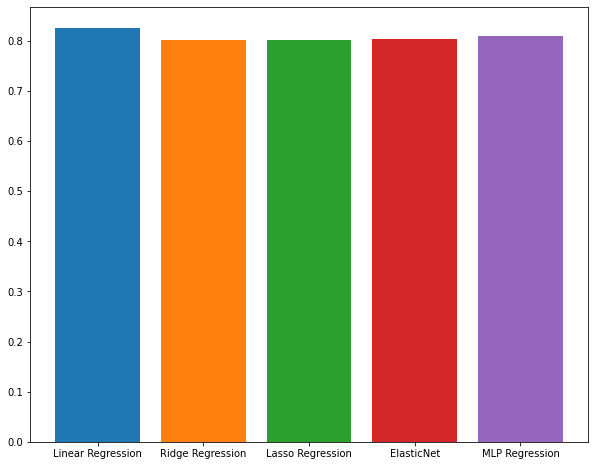

In [135]:
regressors=[('Linear Regression',lin_pipline),('Ridge Regression',lr_pipline),('Lasso Regression',lasr_pipline),('ElasticNet',en_pipline),('MLP Regression',mlpr_pipline)]

for reg_name,pipline in regressors:
  
  acc= pipline.score(x_test,y_test)

  print('{} : {} %'.format(reg_name, acc))
  plt.rcParams["figure.figsize"] = (10,8)
  plt.bar(reg_name,acc)

